In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [3]:
data_import = pd.read_csv('/Users/sitanshurupani/Data Science Coursework/Sem 4/GQP - National Parks/DataSpell Project/Data/Daily_attendance.csv')

In [4]:
all_years_test = data_import
all_years_test.set_index('Full_Date', inplace=True)

In [5]:
all_years_test.index = pd.to_datetime(all_years_test.index)
ds = all_years_test.index.to_series()
all_years_test['YEAR'] = ds.dt.year
all_years_test['MONTH'] = ds.dt.month
all_years_test['DAY_OF_WEEK'] = ds.dt.dayofweek
all_years_test['DAY'] = ds.dt.day
all_years_test['value'] = all_years_test['value'].astype(int)

In [6]:
all_years_test.corr()

,value,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_gust,rain_1h,snow_1h,federal_holiday_flag,school_holiday_flag,YEAR,MONTH,DAY_OF_WEEK,DAY
value,1.000000,0.383747,0.236426,0.361013,-0.006360,-0.080232,-0.040493,-0.187228,-0.204429,NaN,2.339855e-02,1.834527e-01,-3.223185e-01,3.826924e-01,0.104315,8.798483e-02
temp,0.383747,1.000000,0.884068,0.916106,-0.170859,0.184420,-0.064564,-0.099358,-0.065368,NaN,-3.499000e-02,6.818203e-01,1.259219e-01,4.859773e-03,-0.028838,7.461442e-02
temp_min,0.236426,0.884068,1.000000,0.716206,-0.275061,0.473171,-0.041455,-0.068832,0.091801,NaN,-3.489339e-02,6.025052e-01,1.760473e-01,3.587900e-02,-0.021230,1.005057e-01
temp_max,0.361013,0.916106,0.716206,1.000000,-0.101160,0.074207,-0.128698,-0.092744,-0.182735,NaN,-1.297826e-02,6.685481e-01,7.783382e-02,-1.498501e-01,-0.042699,2.303637e-02
pressure,-0.006360,-0.170859,-0.275061,-0.101160,1.000000,-0.151078,-0.261664,-0.192304,-0.223442,NaN,2.465772e-02,-1.704731e-01,2.188783e-02,1.398530e-01,-0.013212,-3.216336e-02
humidity,-0.080232,0.184420,0.473171,0.074207,-0.151078,1.000000,-0.166255,-0.108602,0.310624,NaN,9.125324e-02,1.141114e-01,1.215953e-01,1.972699e-01,0.027986,9.213877e-02
wind_speed,-0.040493,-0.064564,-0.041455,-0.128698,-0.261664,-0.166255,1.000000,0.398268,0.086697,NaN,-6.790653e-02,-1.679953e-01,9.268370e-02,2.754173e-03,0.031832,-1.194273e-02
wind_gust,-0.187228,-0.099358,-0.068832,-0.092744,-0.192304,-0.108602,0.398268,1.000000,0.079415,NaN,-1.925144e-02,-1.204078e-01,3.724639e-01,-2.682338e-01,0.050283,-1.790077e-02
rain_1h,-0.204429,-0.065368,0.091801,-0.182735,-0.223442,0.310624,0.086697,0.079415,1.000000,NaN,-3.267958e-03,-2.227864e-02,8.302651e-03,4.019039e-02,0.050744,5.948148e-02
snow_1h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
all_years_test.drop(columns=['snow_1h', 'temp_max', 'temp_min','YEAR', 'wind_gust', 'pressure'], inplace=True)
all_years_test["federal_holiday_flag"] = all_years_test["federal_holiday_flag"].astype(int)
all_years_test["school_holiday_flag"] = all_years_test["school_holiday_flag"].astype(int)

In [8]:
# all_years_test['wind_gust'].fillna((all_years_test['wind_gust'].mean()), inplace=True)

In [9]:
all_years_test.isna().sum()

value                   0
temp                    0
humidity                0
wind_speed              0
rain_1h                 0
federal_holiday_flag    0
school_holiday_flag     0
MONTH                   0
DAY_OF_WEEK             0
DAY                     0
dtype: int64

In [10]:
df_2021 = all_years_test[all_years_test.index.year==2021]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(all_years_test.loc[:, all_years_test.columns != 'value'], all_years_test['value'], test_size =0.2, random_state = 42)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_2021.loc[:, df_2021.columns != 'value'], df_2021['value'], test_size =0.2, random_state = 42)

In [13]:
mmsca = MinMaxScaler()
# x_standard = df_standard_scale.fit_transform(all_years_test.loc[:, all_years_test.columns != 'value'], copy=True)
X_train_mmsca = pd.DataFrame(mmsca.fit_transform(X_train), columns=X_train.columns)
X_test_mmsca = pd.DataFrame(mmsca.fit_transform(X_test), columns=X_test.columns)

In [14]:
X_train_mmsca.index = X_train.index
X_test_mmsca.index = X_test.index

In [16]:
pr = PoissonRegressor(alpha=1e-6, max_iter=500)
pr.fit(X_train, y_train)
# pr.fit(X_train_mmsca, y_train)

PoissonRegressor(alpha=1e-06, max_iter=500)

In [141]:
y_pr = pr.predict(X_test)
# y_pr = pr.predict(X_test_mmsca)

In [142]:
pred_df = pd.DataFrame(y_pr, columns=['prediction'], index=X_test.index)
# pred_df = pd.DataFrame(y_pr, columns=['prediction'], index=X_test_mmsca.index)

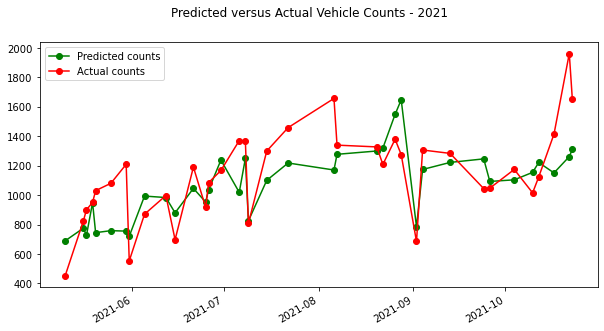

In [143]:
predicted_counts=pred_df['prediction']
actual_counts = y_test
predicted_counts.sort_index(inplace=True)
actual_counts.sort_index(inplace=True)
# predicted_counts = predicted_counts[predicted_counts.index.year==2021]
# actual_counts = actual_counts[actual_counts.index.year==2021]
fig = plt.figure(figsize=(10,5))
fig.suptitle('Predicted versus Actual Vehicle Counts - 2021')
predicted, = plt.plot(predicted_counts.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(actual_counts.index, actual_counts, 'ro-', label='Actual counts')
fig.autofmt_xdate()
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

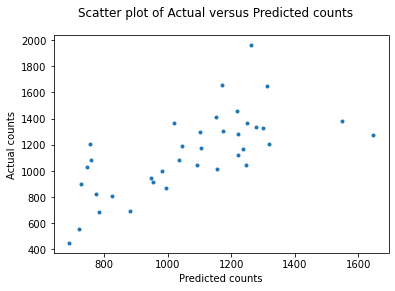

In [144]:
predicted_counts=pred_df['prediction']
actual_counts = y_test
predicted_counts.sort_index(inplace=True)
actual_counts.sort_index(inplace=True)
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

In [145]:
sqrt(mean_squared_error(y_test, pred_df['prediction']))

233.91470715382255

In [146]:
r2_score(y_test, y_pr)

0.41202020003052386

In [118]:
from sklearn.metrics import mean_poisson_deviance
mean_poisson_deviance(y_test, y_pr)

48.050249820525224

In [147]:
df_2019 = all_years_test[all_years_test.index.year==2019]
df_2019.drop(columns=['value'],inplace=True)

/Library/anaconda3/envs/ds_env/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [150]:
y_out_of_sample = pd.DataFrame(pr.predict(df_2019),index=df_2019.index)

In [119]:
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingRegressor
# est = HistGradientBoostingRegressor(loss="poisson", max_leaf_nodes=128)
# est.fit(X_train, y_train)
# y_pr2 = est.predict(X_test)

In [120]:
# pred_df2 = pd.DataFrame(y_pr2, columns=['prediction'], index=X_test.index)

In [121]:
# sqrt(mean_squared_error(y_test, pred_df2['prediction']))

393.7921290457037

In [125]:
# predicted_counts=pred_df2['prediction']
# actual_counts = y_test
# predicted_counts.sort_index(inplace=True)
# actual_counts.sort_index(inplace=True)
# plt.clf()
# fig = plt.figure()
# fig.suptitle('Scatter plot of Actual versus Predicted counts')
# plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
# plt.xlabel('Predicted counts')
# plt.ylabel('Actual counts')
# plt.show()

In [124]:
# predicted_counts=pred_df2['prediction']
# actual_counts = y_test
# predicted_counts.sort_index(inplace=True)
# actual_counts.sort_index(inplace=True)
# # predicted_counts = predicted_counts[predicted_counts.index.year==2021]
# # actual_counts = actual_counts[actual_counts.index.year==2021]
# fig = plt.figure(figsize=(40,10))
# fig.suptitle('Predicted versus Actual Vehicle Counts - 2021')
# predicted, = plt.plot(predicted_counts.index, predicted_counts, 'go-', label='Predicted counts')
# actual, = plt.plot(actual_counts.index, actual_counts, 'ro-', label='Actual counts')
# fig.autofmt_xdate()
# plt.legend(handles=[predicted, actual])
# plt.show()

In [19]:
import inspect
import sklearn

models = [sklearn.linear_model.PoissonRegressor]

for m in models:
    hyperparams = inspect.signature(m.__init__)
    print(hyperparams) # Do something with them here

(self, *, alpha=1.0, fit_intercept=True, max_iter=100, tol=0.0001, warm_start=False, verbose=0)
